#Load Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Maternal Health Risk Data Set.csv to Maternal Health Risk Data Set.csv


In [2]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['Maternal Health Risk Data Set.csv']))

#Viewing Data

In [3]:
import pandas as pd

df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.index

RangeIndex(start=0, stop=1014, step=1)

In [5]:
df.describe()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


#Preprocessing DataSet

In [6]:
X = df.drop(['RiskLevel'],axis=1)
y = df.RiskLevel

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.7 KB


In [8]:
print(X.shape)
print(y.shape)

(1014, 6)
(1014,)


Converting BodyTemp to C from F¶


In [9]:
X.BodyTemp = (X.BodyTemp - 32)*5/9


Since the risk level is ordinal, we label encode it


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Scaling the values¶


In [12]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Plotting

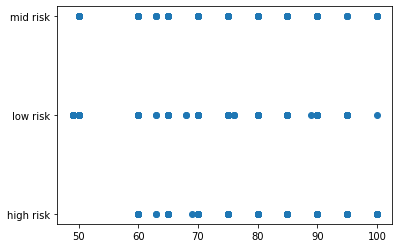

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(df.DiastolicBP, df.RiskLevel)

plt.show()

#Train DataSet

In [19]:
import sklearn
from sklearn.svm import LinearSVC

lsvc = LinearSVC(verbose=0)
print(lsvc)

lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)

LinearSVC()
Score:  0.6313193588162762


In [20]:
from sklearn.metrics import classification_report

ypred = lsvc.predict(X_test)
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        57
           1       0.60      0.91      0.72        78
           2       0.69      0.26      0.38        68

    accuracy                           0.66       203
   macro avg       0.69      0.65      0.63       203
weighted avg       0.68      0.66      0.62       203

